# Mainak Chattopadhyay 21BAI1217

GLCM ((Gray Level Co-occurrence Matrix)) Texture Feature Extraction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Function to calculate GLCM
def calculate_glcm(image, distances, angles, levels):
    glcm = np.zeros((levels, levels, len(distances), len(angles)))

    for i, d in enumerate(distances):
        for j, a in enumerate(angles):
            shifted = np.roll(image, d, axis=(0, 1))
            mask = (image >= 0) & (shifted >= 0) & (image < levels) & (shifted < levels)
            glcm[:, :, i, j] += np.bincount(image[mask] * levels + shifted[mask], minlength=levels**2).reshape(levels, levels)

    return glcm / np.sum(glcm, axis=(0, 1))

In [ ]:
# Function to calculate contrast from GLCM
def calculate_contrast(glcm):
    levels = glcm.shape[0]
    contrast = 0
    for i in range(levels):
        for j in range(levels):
            contrast += ((i - j) ** 2) * glcm[i, j]
    return contrast

In [ ]:
# Function to perform Otsu's thresholding
def otsu_threshold(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])
        q1, q2 = Q[i], Q[255]-Q[i]
        if q1 < 1.e-6 or q2 < 1.e-6:
            continue
        b1, b2 = np.hsplit(bins, [i])
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    return thresh

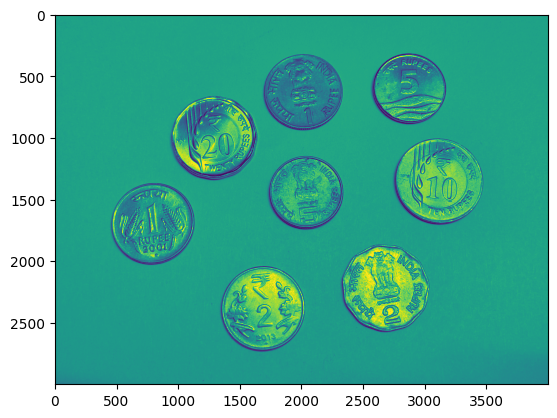

In [ ]:
# Load sample image using OpenCV
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [ ]:
# Define distances and angles for GLCM
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

In [ ]:
# Calculate GLCM
glcm = calculate_glcm(image, distances, angles, 256)

In [ ]:
# Calculate contrast from GLCM
contrast = calculate_contrast(glcm)

In [ ]:
# Print extracted texture features
print("Contrast:", contrast)

Contrast: [[146.9243075  146.9243075  146.9243075  146.9243075 ]
 [426.2323115  426.2323115  426.2323115  426.2323115 ]
 [690.73379517 690.73379517 690.73379517 690.73379517]]


In [ ]:
# Perform Otsu's thresholding
thresh = otsu_threshold(image)
binary_image = (image > thresh).astype(np.uint8) * 255

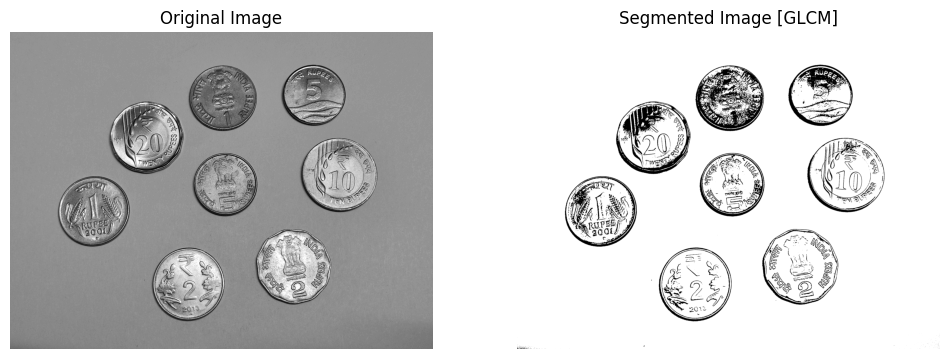

In [ ]:
# Display original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Image [GLCM]')
plt.axis('off')

plt.show()

LBP (Local Binary Patterns) Texture Extraction


In [ ]:
!pip install opencv-python-headless
!pip install scikit-image
!pip install scikit-learn

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Function to extract LBP features
def extract_lbp_features(image, radius=1, n_points=8):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize the histogram
    return hist

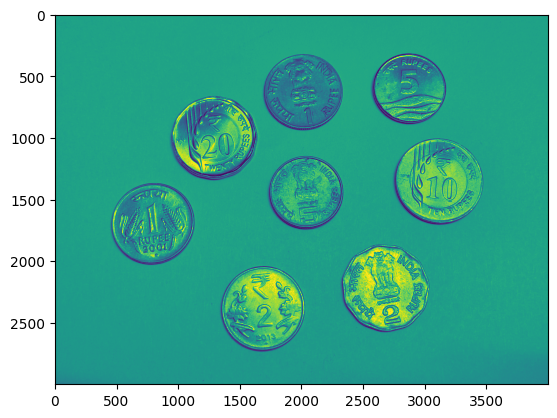

In [ ]:
# Load sample image using OpenCV
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [ ]:
# Extract LBP features
lbp_features = extract_lbp_features(image)

Text(0.5, 1.0, 'Original Image')

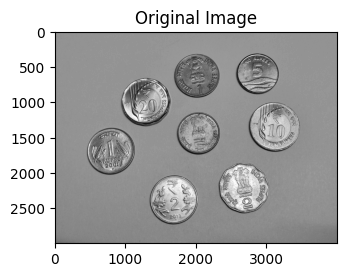

In [ ]:
# Display original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')


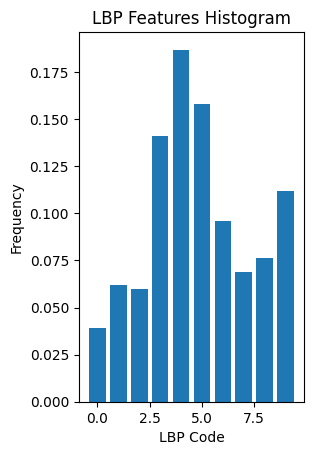

In [ ]:
# Display LBP features histogram
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(lbp_features)), lbp_features)
plt.title('LBP Features Histogram')
plt.xlabel('LBP Code')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Segmentation using K-means clustering
def segment_image(image, k=2):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 1)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Reshape the labels to the original image shape
    segmented_image = kmeans.labels_.reshape(image.shape)
    return segmented_image


In [ ]:
# Perform segmentation
segmented_image = segment_image(image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


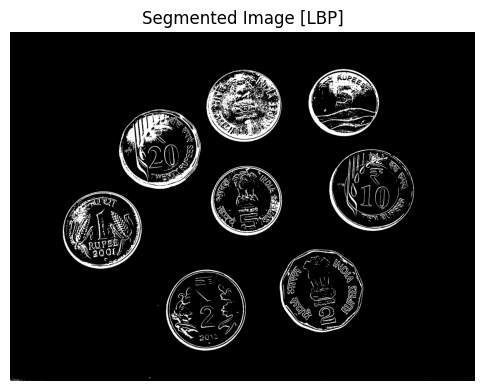

In [ ]:
# Display segmented image
plt.figure(figsize=(6, 6))
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image [LBP]')
plt.axis('off')
plt.show()

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving 21BAI1217_LAB9_MV.ipynb to 21BAI1217_LAB9_MV.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>